In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


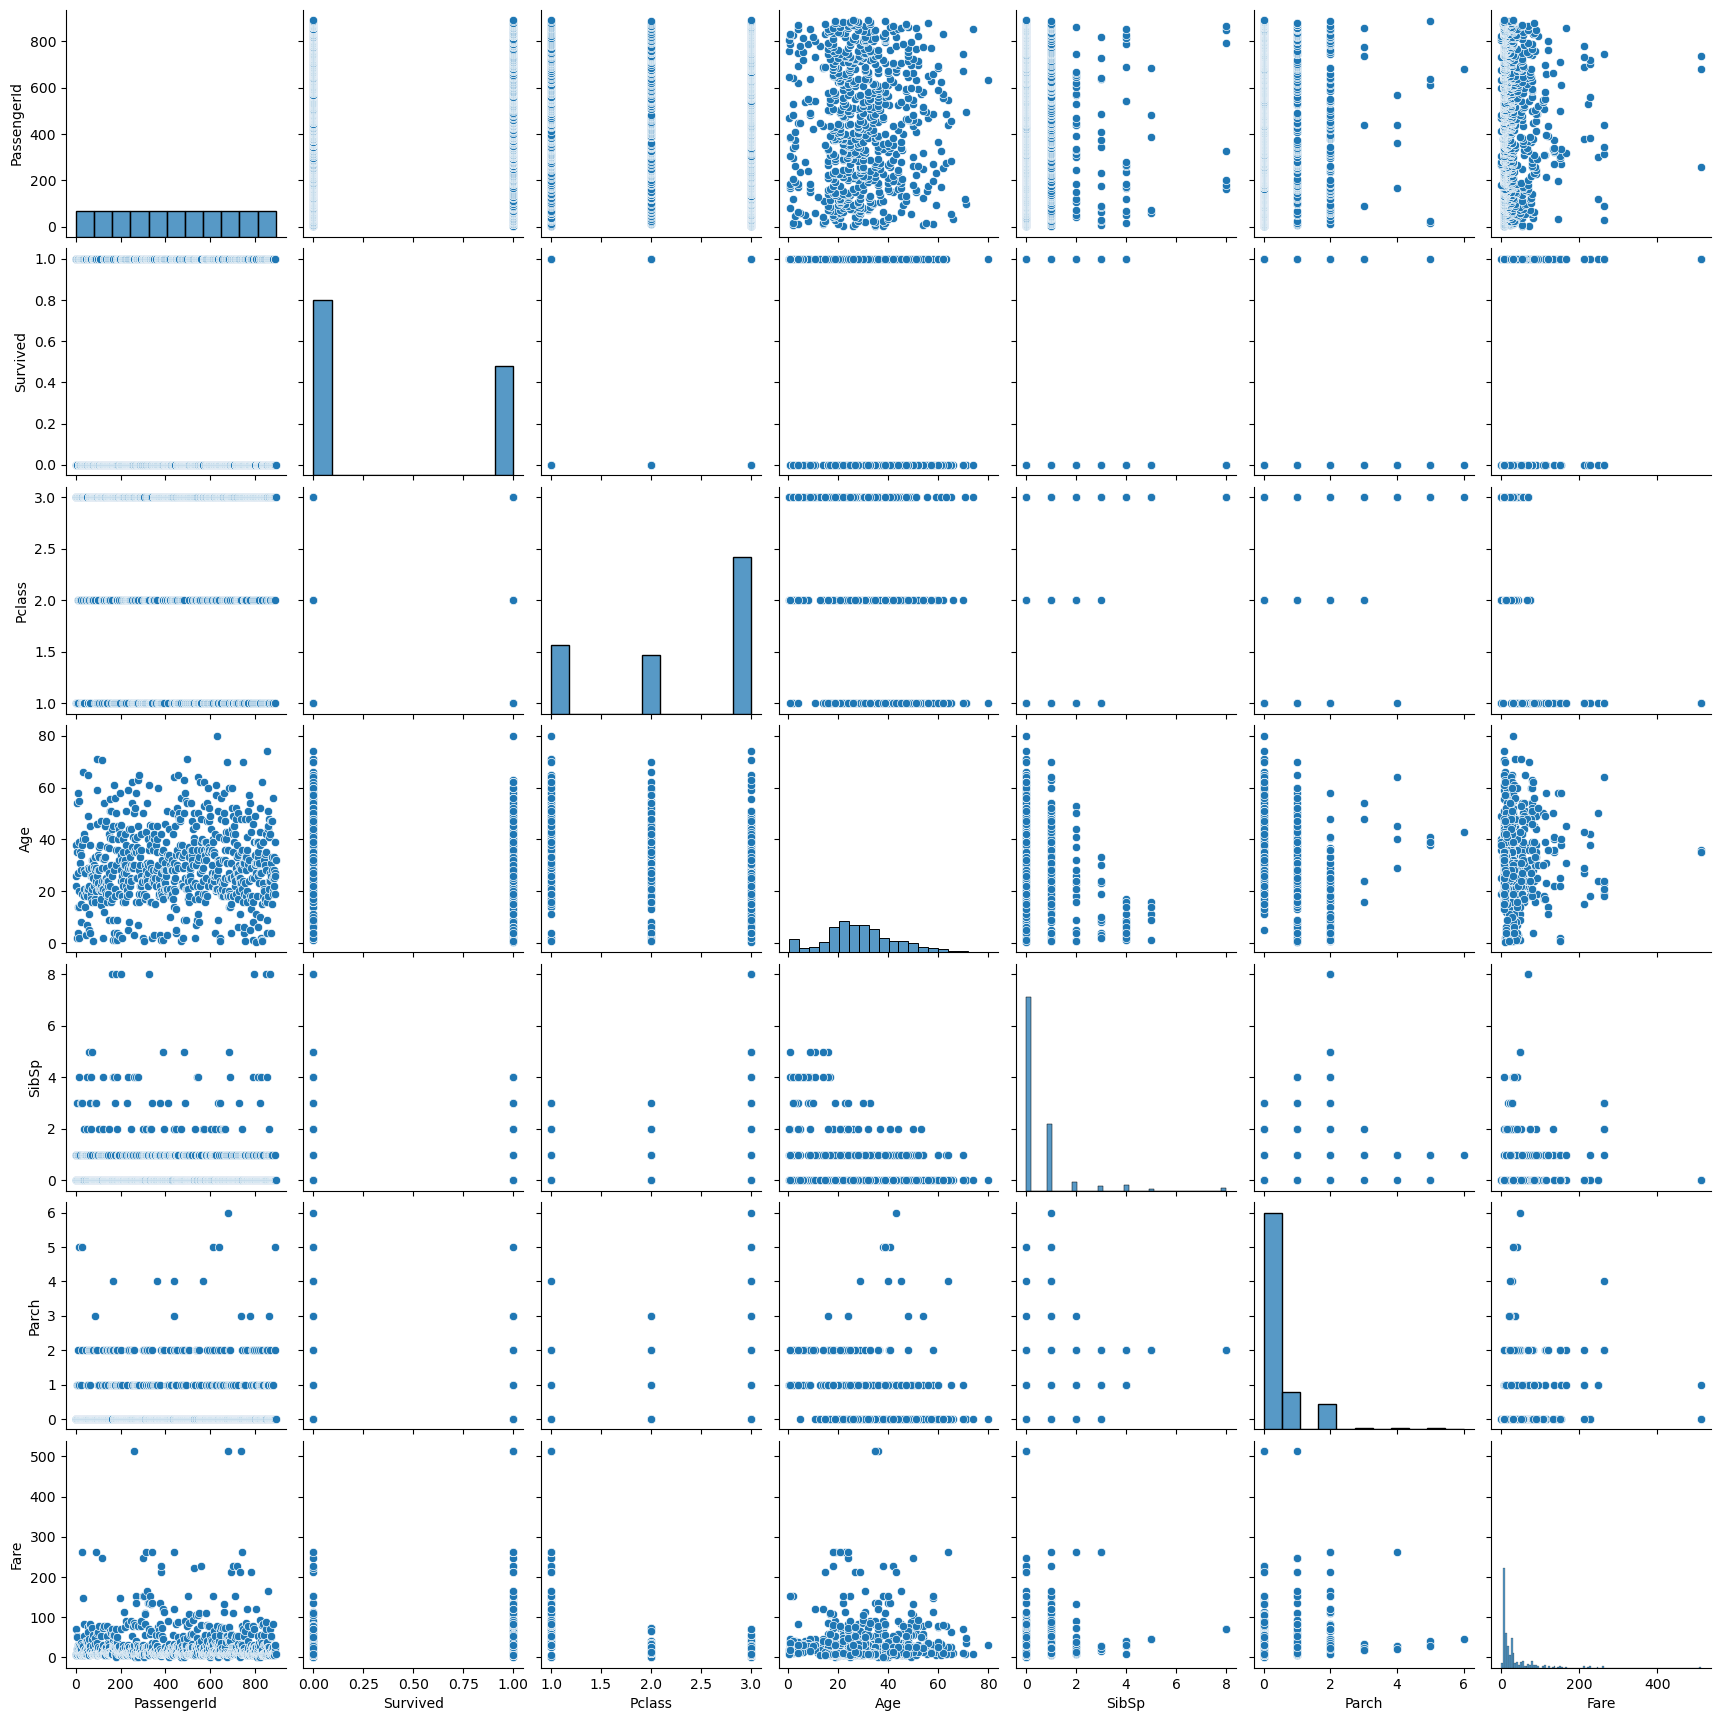

In [9]:
sns.pairplot(data=df)
plt.show()

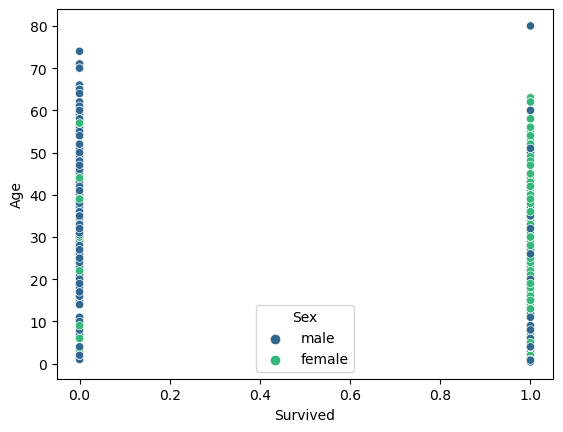

In [19]:
sns.scatterplot(y='Age',x='Survived',data=df,hue='Sex', palette ="viridis")
plt.show()

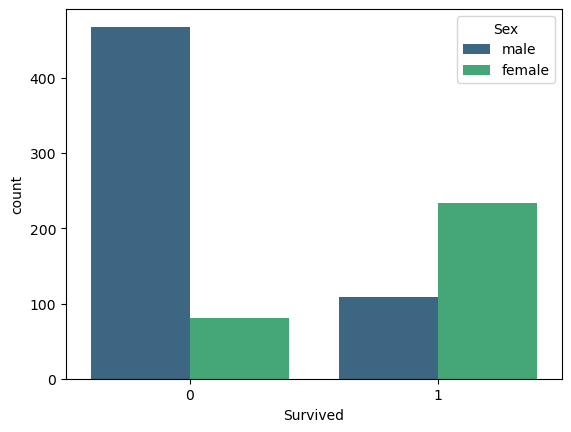

In [32]:
#counts the passengers survied & not and also difference between male and female passengers survival
sns.countplot(x='Survived', data=df, hue='Sex', palette='viridis') 
plt.show()

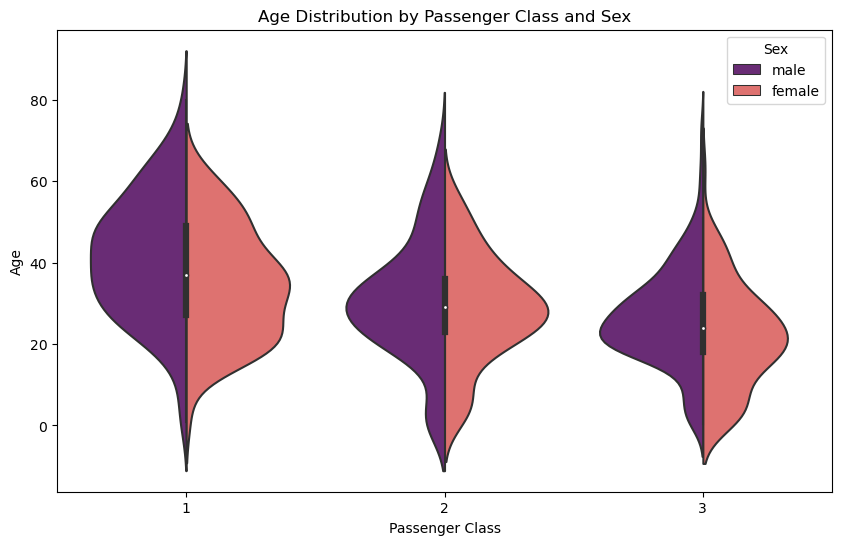

In [39]:
#Plots age distrtibution for each passsenger class.We understand that what each people belong to which class & their sex
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', hue='Sex', data=df, palette='magma', split=True)
plt.title('Age Distribution by Passenger Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

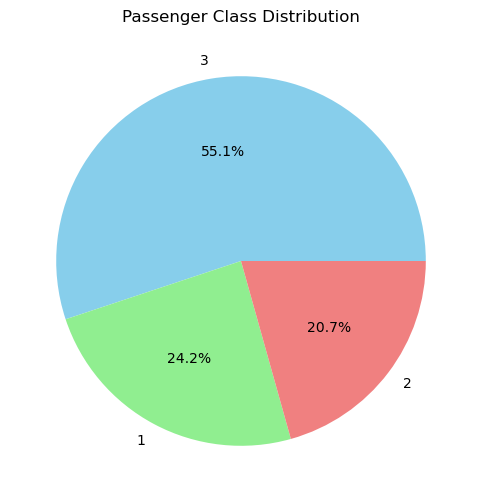

In [40]:
#Plots passenger percentage for each class. We undertsand how many passengers belong to each class
class_counts = df['Pclass'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Passenger Class Distribution')
plt.show()

C:\Users\tejas\AppData\Local\Temp\ipykernel_18592\369140157.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_survival.index, y=sex_survival.values,palette='plasma')
C:\Users\tejas\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\tejas\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


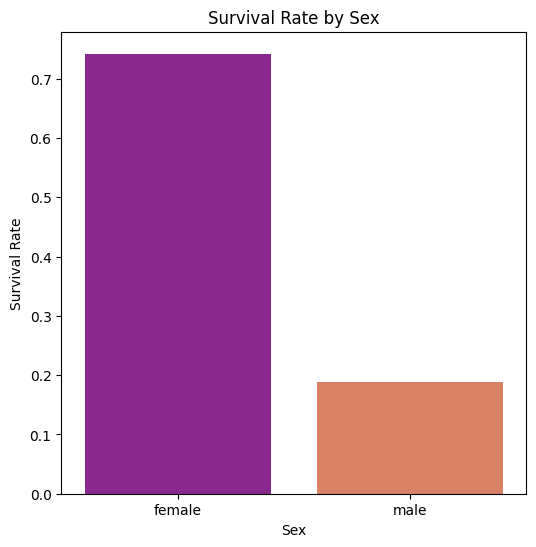

In [12]:
#plot shows survival rate of fmeals is more than males..about >70% females a=& <20% male ssurvived and femaled survived >50% 
#than males
plt.figure(figsize=(6, 6))
sex_survival = df.groupby('Sex')['Survived'].mean()
sns.barplot(x=sex_survival.index, y=sex_survival.values,palette='plasma')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

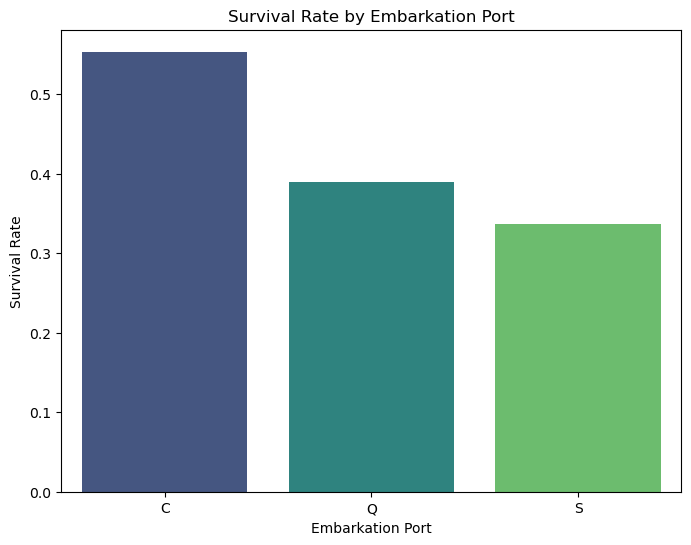

In [13]:
#The x-axis represents the embarkation ports ('C' for Cherbourg, 'Q' for Queenstown, and 'S' for Southampton).
#The y-axis represents the mean survival rate for each embarkation port.
plt.figure(figsize=(8, 6))
embarkation_survival = df.groupby('Embarked')['Survived'].mean()
sns.barplot(x=embarkation_survival.index, y=embarkation_survival.values, palette='viridis')
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()

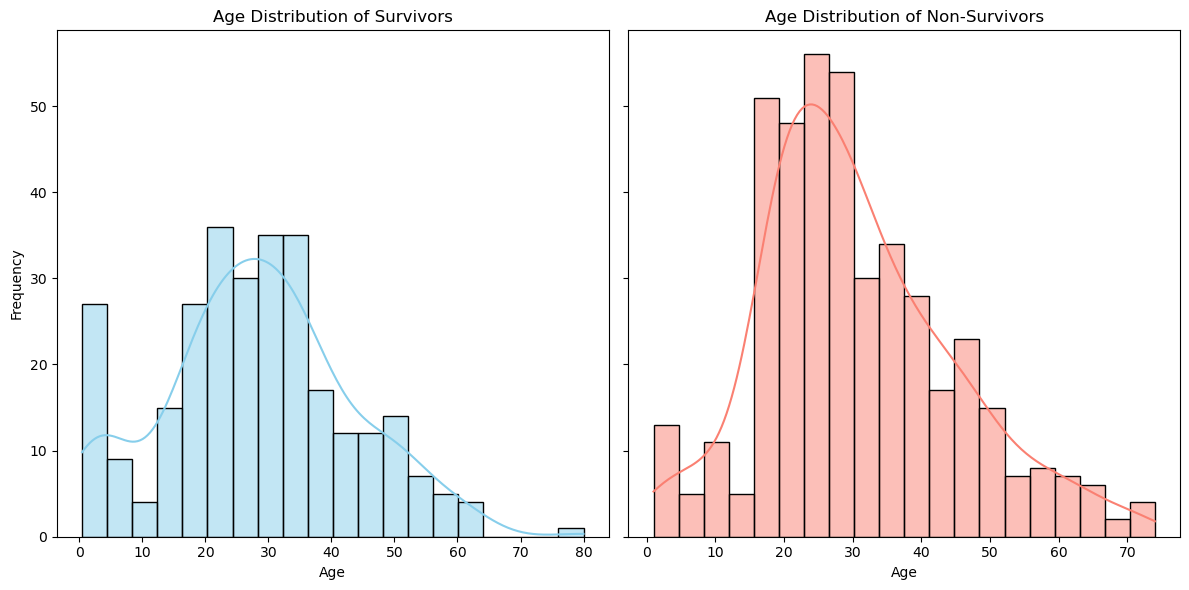

In [41]:
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Plot histogram of age for survivors
sns.histplot(data=survived, x='Age', bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Age Distribution of Survivors')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plot histogram of age for non-survivors
sns.histplot(data=not_survived, x='Age', bins=20, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Age Distribution of Non-Survivors')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\Rushi-Raj\AppData\Local\Temp\ipykernel_13520\2920806283.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='SibSp',bins=20, kde=True, ax=axes[0], palette='Set1')


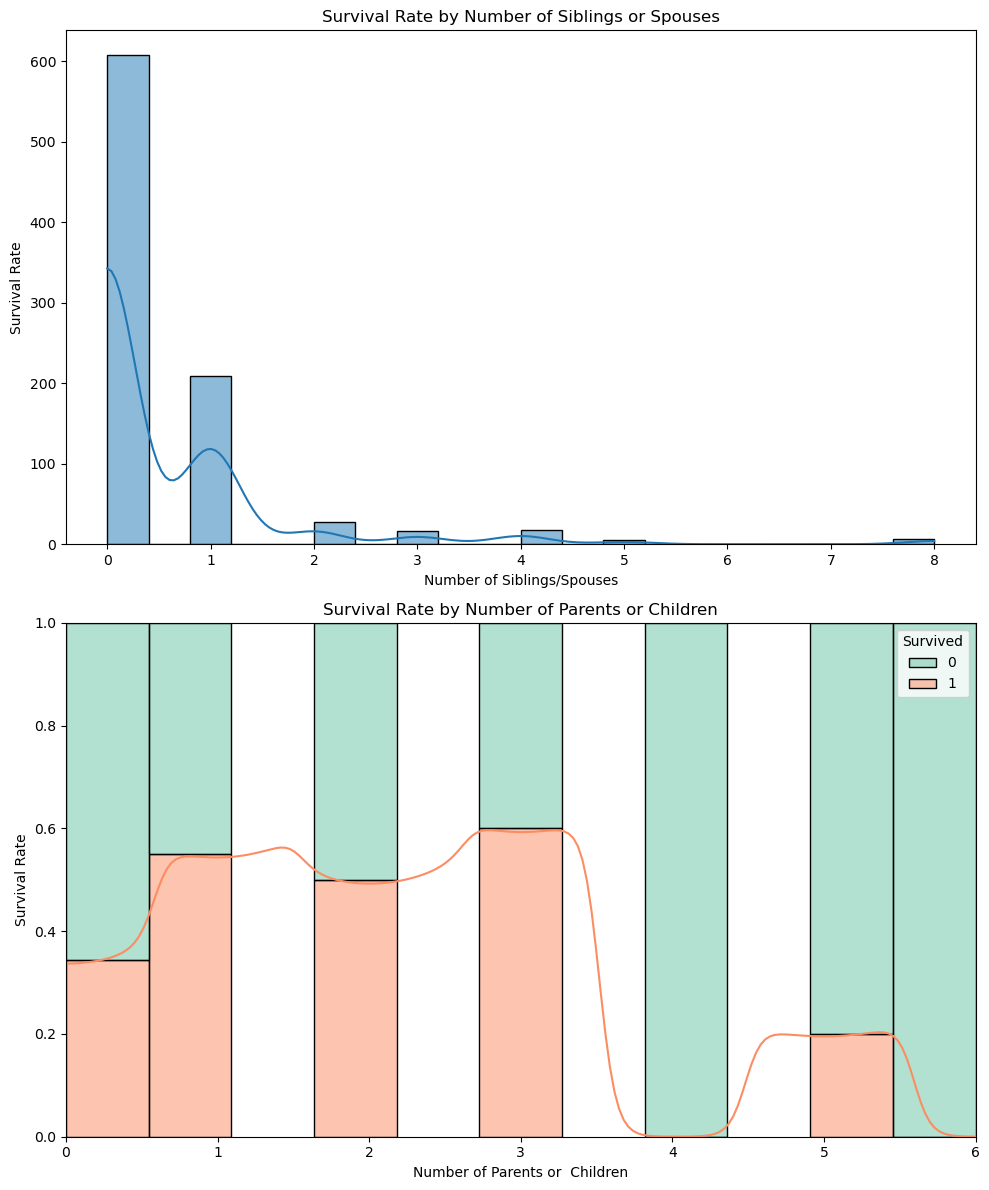

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Plot histogram with KDE for SibSp
# sns.histplot(data=survived, x='Age', bins=20, kde=True, color='skyblue', ax=axes[0])
sns.histplot(data=df, x='SibSp',bins=20, kde=True, ax=axes[0], palette='Set1')
axes[0].set_title('Survival Rate by Number of Siblings or Spouses')
axes[0].set_xlabel('Number of Siblings/Spouses')
axes[0].set_ylabel('Survival Rate')

# Plot histogram with KDE for Parch
sns.histplot(data=df, x='Parch', hue='Survived', multiple='fill', kde=True, ax=axes[1], palette='Set2')
axes[1].set_title('Survival Rate by Number of Parents or Children')
axes[1].set_xlabel('Number of Parents or  Children')
axes[1].set_ylabel('Survival Rate')

plt.tight_layout()
plt.show()

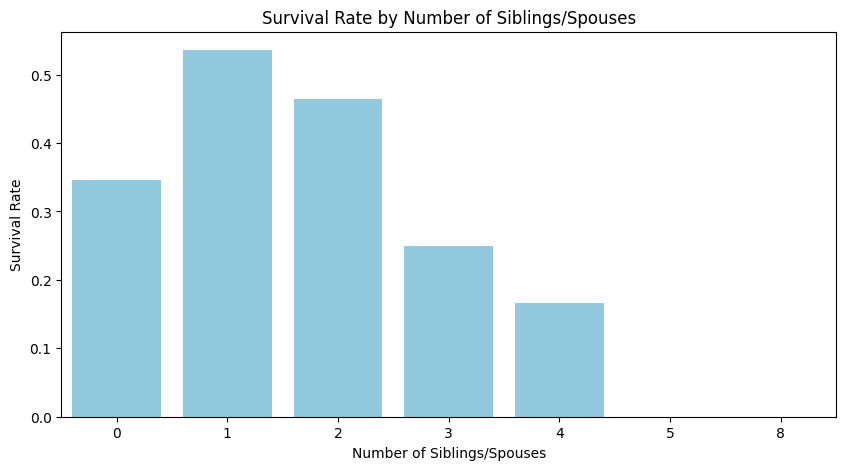

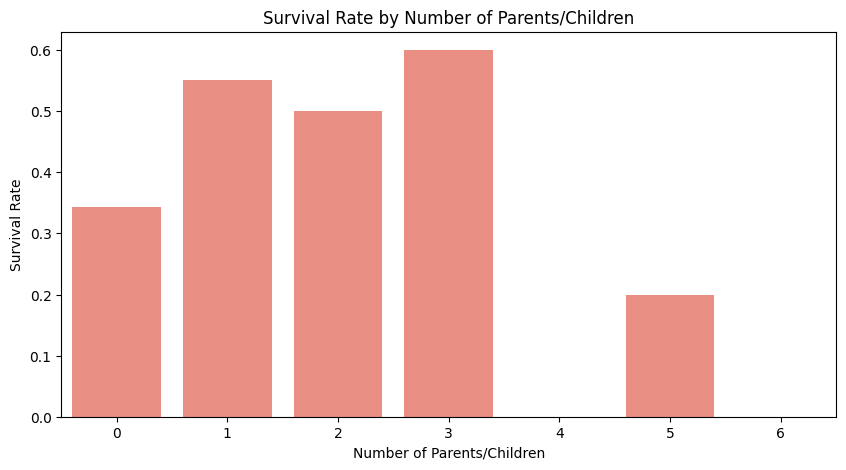

In [16]:
survival_by_sibsp = df.groupby('SibSp')['Survived'].mean()
survival_by_parch = df.groupby('Parch')['Survived'].mean()

# Plot survival rates based on SibSp
plt.figure(figsize=(10, 5))
sns.barplot(x=survival_by_sibsp.index, y=survival_by_sibsp.values, color='skyblue')
plt.title('Survival Rate by Number of Siblings/Spouses')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')
plt.show()

# Plot survival rates based on Parch
plt.figure(figsize=(10, 5))
sns.barplot(x=survival_by_parch.index, y=survival_by_parch.values, color='salmon')
plt.title('Survival Rate by Number of Parents/Children')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Survival Rate')
plt.show()

In [17]:
### 2. Write a code to check how the price of the ticket (column name: 'fare') for each passenger
### is distributed by plotting a histogram.



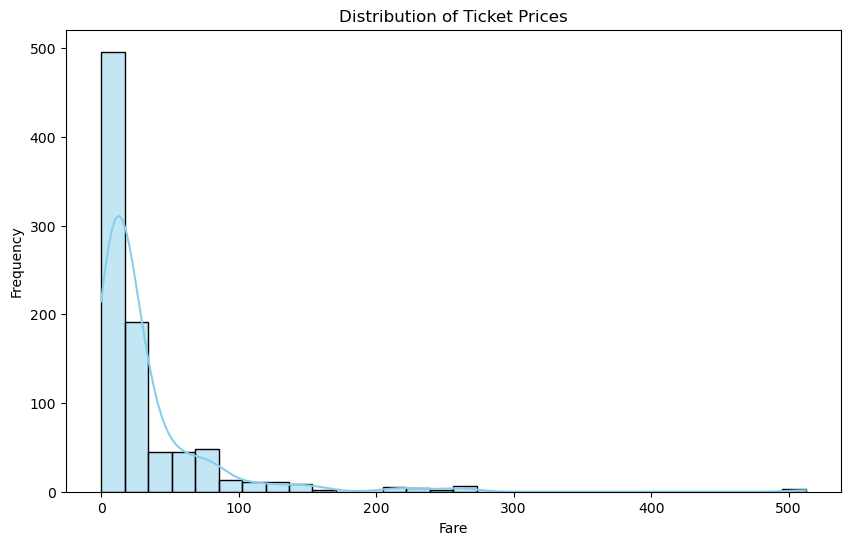

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Ticket Prices')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()